In [1]:
import pandas as pd      # 处理二维表格
import numpy as np       # 数值计算模块

In [7]:
X_FI = pd.read_excel(r'D:\FI.xlsx')
X_FI.head()           # 默认展示表格前五行信息

,PKU_sum,PKU_wide,PKU_deep,PKU_Pay,bad_loan,insurance_density,insurance_pi,bank_card_pop,debit_card_pop,ATM_area,fin_sub_pop_area,SME_loanshare_assetshare,ag_loanshare_gdpshare
0,79.41,97.53,72.23,79.40,-0.77,4125.0,-0.283831,4.549321,3.651193,0.745808,1.108453,0.525632,5.011827
1,150.65,155.56,159.42,110.02,-0.59,4269.0,-0.309830,5.318206,4.282371,0.928599,1.111657,0.588172,4.988654
2,215.62,193.86,247.50,136.53,-0.54,4753.5,-0.319978,6.205079,5.001334,1.161763,1.138639,0.594903,6.007383
3,235.36,243.92,219.89,196.25,-0.72,5659.0,-0.337131,7.143905,5.761880,1.373784,1.235555,0.597189,6.489348
4,276.38,268.39,234.17,243.23,-0.84,6502.0,-0.361139,7.807658,6.385998,1.936346,1.292170,0.603119,7.456982


In [9]:
# 数据预处理
from sklearn.preprocessing import StandardScaler # 导入数据标准化模块
scaler = StandardScaler() # 实例化标准化处理的类
X2_FI = pd.DataFrame(scaler.fit_transform(X_FI)) # scaler.fit_transform()函数对数据进行标准化:（x-均值）/方差
X2_FI.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.890503,-0.341297,-1.043832,-0.507662,0.680702,2.861062,1.116578,1.213193,0.838886,1.098800,1.606140,-0.706194,0.695985
1,0.174825,0.569799,0.459409,0.011437,1.021480,3.009700,0.698249,1.871537,1.489464,1.490824,1.612222,-0.412241,0.684209
2,1.146390,1.171126,1.977994,0.460860,1.116141,3.509807,0.534973,2.630907,2.230525,1.990879,1.663451,-0.380603,1.201868
3,1.441584,1.957089,1.501971,1.473290,0.775362,4.444474,0.258970,3.434761,3.014448,2.445592,1.847454,-0.369858,1.446775
4,2.055000,2.341279,1.748172,2.269739,0.548177,5.314628,-0.127319,4.003088,3.657748,3.652091,1.954941,-0.341988,1.938471


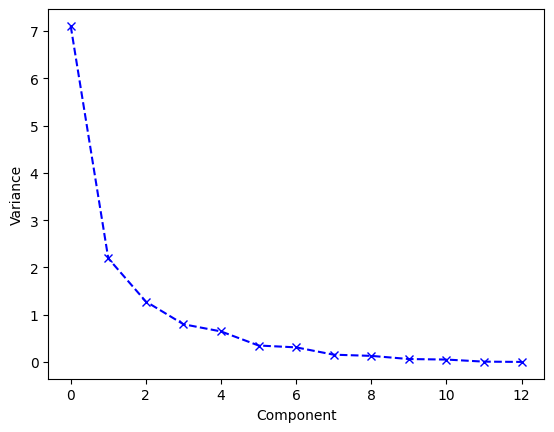

In [12]:
import matplotlib.pyplot as plt # 导入画图的库
from sklearn.decomposition import PCA # 导入主成分分析的类
pca = PCA(n_components=13)   # 13个指标（13个列）
rduced_x = pca.fit_transform(X2_FI) # 运用pca.fit_transform()函数进行主成分分析
covper = pca.explained_variance_    # covper变量用来储存主成分分析后13个方差的值
covper = pd.DataFrame(np.round(covper,3)) # covper中的数据保留3位小数并将其放入二维表中

plt.plot(covper,'bx--') # plot():画图函数 b:blue线颜色为蓝色，--表示虚线
plt.xlabel('Component') # 命名x轴
plt.ylabel('Variance')  # 命名y轴
plt.show()

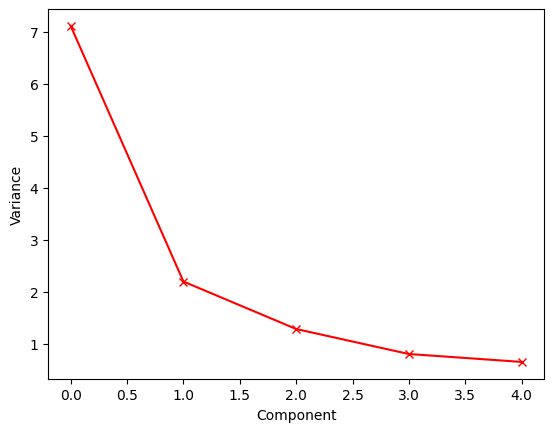

In [14]:
pca = PCA(n_components = 5)
reduced_x = pca.fit_transform(X2_FI)
covper = pca.explained_variance_
covper = pd.DataFrame(np.round(covper,3))

plt.plot(covper,'rx-')
plt.xlabel('Component')
plt.ylabel('Variance')
plt.show()

In [17]:
result = pd.DataFrame(np.round(reduced_x,3))
result.head(10)

,0,1,2,3,4
0,1.256,3.523,0.573,1.031,-0.247
1,3.222,2.861,0.834,0.220,-0.848
2,5.355,2.614,0.920,-0.167,-1.172
3,7.059,2.691,0.773,0.250,-1.303
4,8.984,2.961,0.754,0.287,-1.172
5,-0.245,3.238,0.078,0.627,1.213
6,1.297,2.570,0.474,-0.033,0.933
7,3.029,2.021,0.475,-0.225,1.118
8,4.189,1.943,-0.133,0.627,0.571
9,5.586,1.557,-0.387,1.097,0.783


列的0-4五个指标可以替代原来的13个指标，5个主成分等价于原来的13个指标.
那这5个指标和原来13个的有什么联系呢？之间的系数是什么样的？

In [22]:
# 将权重赋值给coefficient变量
coefficient = pd.DataFrame(np.round(pca.components_,3),columns = X_FI.columns) # pca.components_可以将它们之间的系数，关系表现出来
coefficient.head()

,PKU_sum,PKU_wide,PKU_deep,PKU_Pay,bad_loan,insurance_density,insurance_pi,bank_card_pop,debit_card_pop,ATM_area,fin_sub_pop_area,SME_loanshare_assetshare,ag_loanshare_gdpshare
0,0.329,0.344,0.321,0.328,-0.110,0.306,-0.158,0.358,0.358,0.271,0.222,0.009,0.230
1,-0.294,-0.233,-0.186,-0.241,0.305,0.298,0.352,0.090,0.031,0.391,0.466,0.117,0.261
2,0.065,0.038,0.066,0.035,0.511,-0.018,-0.191,-0.037,-0.048,0.130,0.197,-0.719,-0.338
3,-0.012,0.024,-0.254,0.123,-0.574,0.004,0.517,0.051,0.062,-0.003,0.069,-0.559,0.018
4,-0.134,-0.143,-0.098,-0.149,-0.303,-0.118,-0.620,-0.145,-0.166,0.097,0.191,-0.246,0.533


5个主成分的13个指标的对应权重,5个成分中每一个成分都是是原先13个指标的线性组合

In [23]:
# 结果导入excel表
result.to_excel(r'D:\大学学科\投资学\result.xlsx')
coefficient.to_excel(r'D:\大学学科\投资学\coefficient.xlsx')